# House Price Prediction - Linear Regression
## Project Background
This project examines the use of machine learning techniques to predict house prices based on a number of features such as property size and number of bedrooms. The insights gained from this project can guide in pricing strategies in real estate. Further, in a challenging housing market, this analysis can help buyers focus on essential features, making it easier to find a home that meets their needs and fits their budget.

##Literature Review
The global housing market faces challenges such as rising house prices, affordability issues and economic uncertainty, which in turn has made homeownership difficult for many to attain. According to the International Monetary Fund (IMF), housing affordability is lower than it was during the housing bubble prior to 2007-08 financial crisis (International Monetary Fund, 2023), demonstrating the regressive direction house prices have settled on currently compared to 2007. Further illustrating the affordability crisis, reports from the Wall Street Journal showed rent and house prices are rising faster than incomes exacerbating the uncertainty in the house marking for many.

Studies have highlighted factors influencing house prices such as location, number of rooms and the type of house (Cheshire and Sheppard, 1995). Whilst these factors have been well documented and understood as real predictors of house prices, there are notable gaps in research. For example, there is less research on analysing influence of perceived less influential factors, such as whether the building has air conditioning or whether it situated on a main road. Whilst these may seem less important, this project will delve into a number of various features of houses to assess the impact these have on house prices. This project aims to provide a more holistic understanding of the house market and improve price predictions, using linear regression modelling.

###Linear Regression

Linear Regression was chosen for this project as it best shows the relationship between house price (target variable) and other features such as area, number of bedrooms and bathrooms. It is most suitable since the target variable (house price) is continuous. It allows us to see how each feature is related to the price through analysing the coefficients.

#Data

The data was sourced from Kaggle: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/data

Data Features:

1. **price** (dtype: numerical)
2. **area** (dtype: numerical)
3. **bedrooms** (dtype: numerical)
4. **bathrooms** (dtype: numerical)
5. **stories** (dtype: numerical)
6. **mainroad** (dtype: categorical)
7. **guestroom** (dtype: categorical)
8. **basement** (dtype: categorical)
9. **hotwaterheating** (dtype: categorical)
10. **airconditioning** (dtype: categorical)
11. **parking** (dtype: numerical)
12. **prefarea** (dtype: categorical)
13. **furnishingstatus** (dtype: categorical)




| Feature            | Data Type     | Description                                |
|---------------------|---------------|--------------------------------------------|
| **price**          | Numerical     | Target variable representing house price   |
| **area**           | Numerical     | Total area of the house                   |
| **bedrooms**       | Numerical     | Number of bedrooms in the house           |
| **bathrooms**      | Numerical     | Number of bathrooms in the house          |
| **stories**        | Numerical     | Number of stories                         |
| **mainroad**       | Categorical   | Whether the house is near the main road   |
| **guestroom**      | Categorical   | Whether the house has a guestroom         |
| **basement**       | Categorical   | Whether the house has a basement          |
| **hotwaterheating**| Categorical   | Availability of hot water heating         |
| **airconditioning**| Categorical   | Availability of air conditioning          |
| **parking**        | Numerical     | Number of parking spaces                  |
| **prefarea**       | Categorical   | Whether the house is in a preferred area  |
| **furnishingstatus**| Categorical  | Furnishing status of the house            |
<br><br><br>

  Categorical Variables Encoding:

| **Feature**          | **Encoding**                                                  |
|-----------------------|--------------------------------------------------------------|
| **mainroad**          | 1 = Yes (on a main road), 0 = No                             |
| **guestroom**         | 1 = Yes (has a guest room), 0 = No                           |
| **basement**          | 1 = Yes (has a basement), 0 = No                             |
| **hotwaterheating**   | 1 = Yes (has hot water facilities), 0 = No                   |
| **airconditioning**   | 1 = Yes (has air conditioning), 0 = No                       |
| **prefarea**          | 1 = Yes (in a preferred area), 0 = No                        |
| **furnishingstatus**  | 0 = Furnished, 1 = Semi-furnished, 2 = Unfurnished           |
<br><br><br>

ETL Pipeline




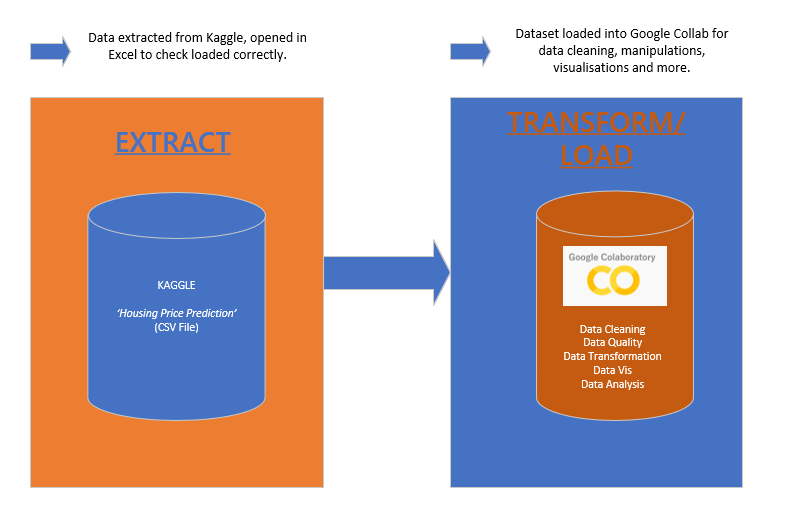


#Transformation

The data was downloaded from Kaggle and stored on my local computer. Google Collaboration was then used to import the dataset and the various libraries were installed.

I imported libraries such as Pandas and NumPy for data manipulation, Matplotlib and Seaborn for visualizations, Scikit-learn for machine learning, Statsmodels for statistical analysis, and IPython display tools for better visualization within Google Collab.

###Tools

For this project Google Collaboration was chosen due to its easy-to-use format and pre installed libraries.

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Upload the file
uploaded = files.upload()

# Load the dataset
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving Housing.csv to Housing (2).csv


The file was loaded into Google Collab via an upload button that allowed me to choose the file stored on my local drive.

##Data Quality

The first step involves performing data quality checks. These were done in line with DAMA-DMBOK2 framework. The main data quality principles include completeness, accuracy, consistency, reliablity and validity, to name a few (DAMA Netherlands, 2020).

Below, the first 5 rows of data were displayed to ensure the dataset was loaded correctly, pertaining to completeness in DAMA-DMBOK2.

Columns were checked to ensure no missing values were present. All columns were complete with no missing values. Data types and Duplicate rows were checked. There were no duplicate rows.

In [ ]:
# Understand the Data
# Using Pandas to display general information about the dataset.
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
print("\nCheck for Missing Values:")
print(data.isnull().sum())


Check for Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:

#step 3: Check for Duplicates and remove if present
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    data = data[~duplicates]
    print(f"Data after removing duplicates: {data.shape}")

Number of duplicate rows: 0


There are 545 rows in this dataset and 13 columns.

In [ ]:
print("\nDataset Shape (Rows, Columns):")
print(data.shape)


Dataset Shape (Rows, Columns):
(545, 13)


In [ ]:
print("\nDataset Columns:")
print(data.columns.tolist())


Dataset Columns:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


Examining summary statistics provides some insights into the dataset, for example looking at key metrics such as mean and standard deviation. This step helps to identify any potential issues, such as extreme outliers and inform on the next steps.

In [ ]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


###Identifying Outliers

Below boxplots were produced for numerical columns to visually check for outliers, providing a clear image of data spread and potential anomalies.

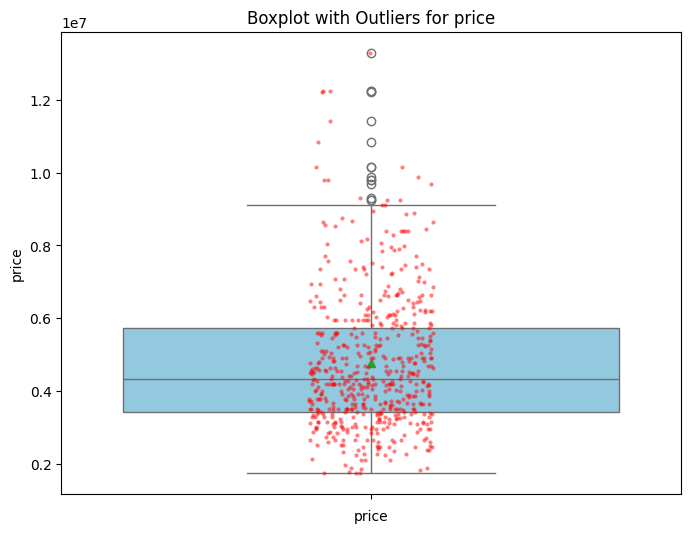

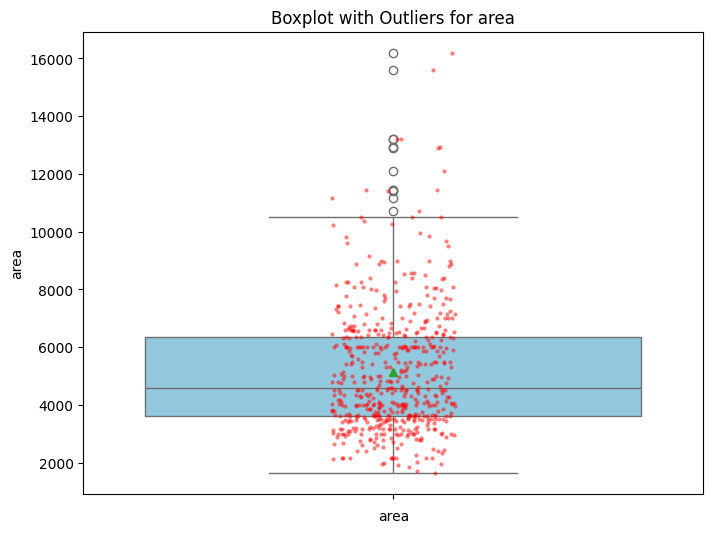

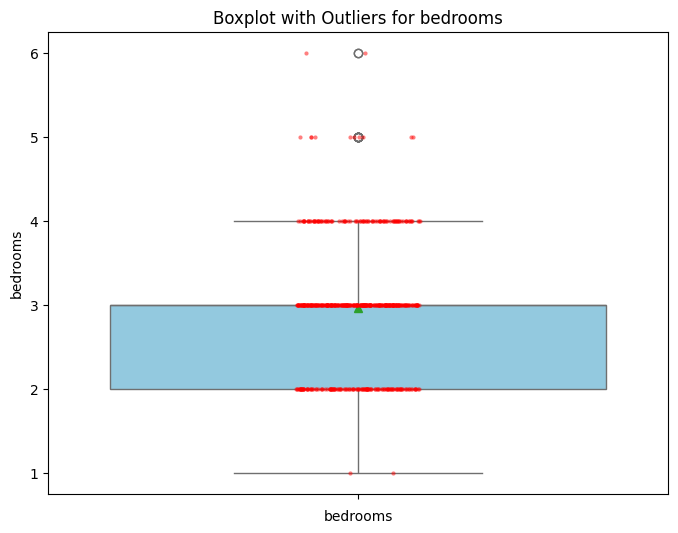

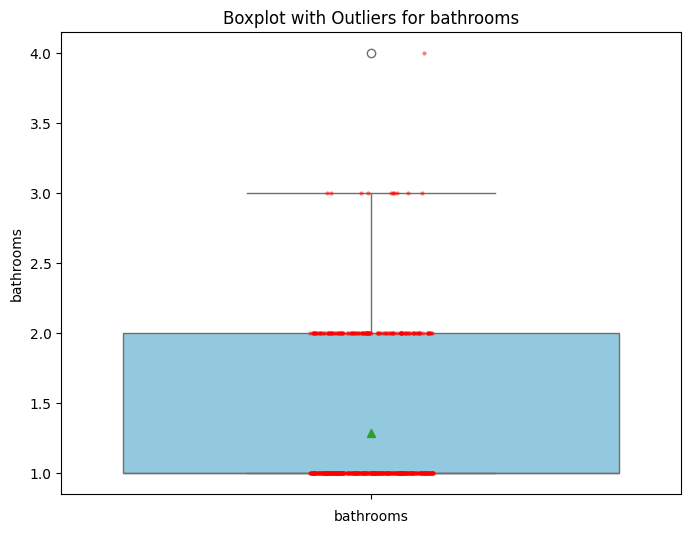

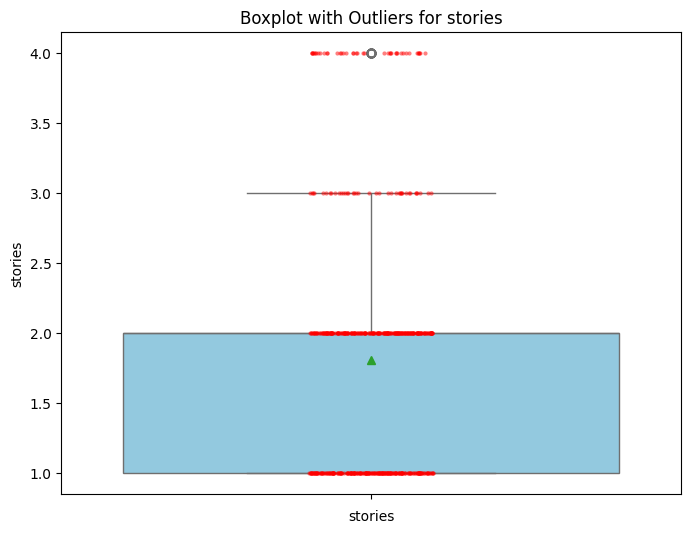

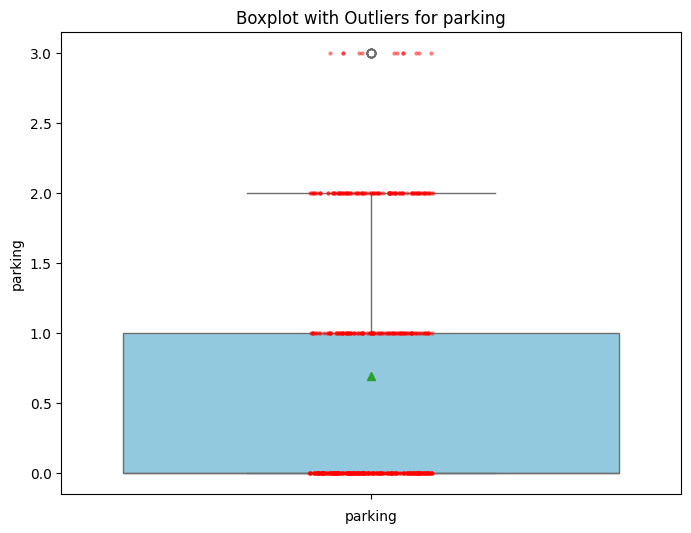

In [ ]:
# Step 2: List of numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Step 3: Detect and Visualize Outliers for Each Column
for col in numerical_columns:
    # Plot a combined boxplot and swarmplot for each column
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col], color='skyblue', showmeans=True)
    sns.stripplot(data[col], color='red', alpha=0.5, jitter=True, size=3)
    plt.title(f"Boxplot with Outliers for {col}")
    plt.xlabel(col)
    plt.show()

From the above we detected extreme outliers in the 'price' column. On closer inspection, the rows seemed like valid data points based on other features (e.g., furnished, more bedrooms, bigger area), leading to assumptions the price reflects the luxury of this property. For that reason outliers in 'price' column were capped using the interquartile range (IQR), which ensures extreme high values are capped to reduce their impact on analysis.



In [ ]:
# Detect and cap outliers in the price column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for capping
extreme_upper_bound = Q3 + 3 * IQR

# Cap the price column at the extreme upper bound
data['price'] = data['price'].clip(upper=extreme_upper_bound)

print(f"The maximum value of 'price' after capping: {data['price'].max()}")



The maximum value of 'price' after capping: 12670000


As part of EDA, visualisations were generated to identify any patterns or obvious relationships.

From the graphs, Distribution of House Prices shows a lot of house prices are in the lower price range.

The Area vs House Prices graph shows that there is a positive correlation between area of the property and house prices, indicating larger areas tend to be associated with higher prices.

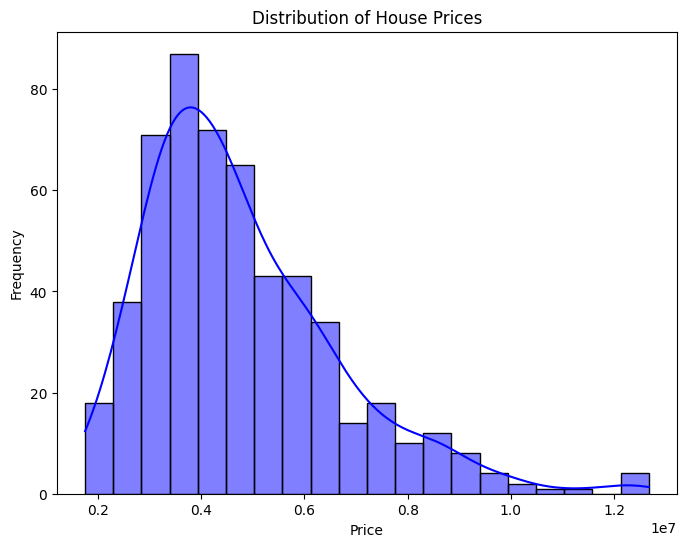

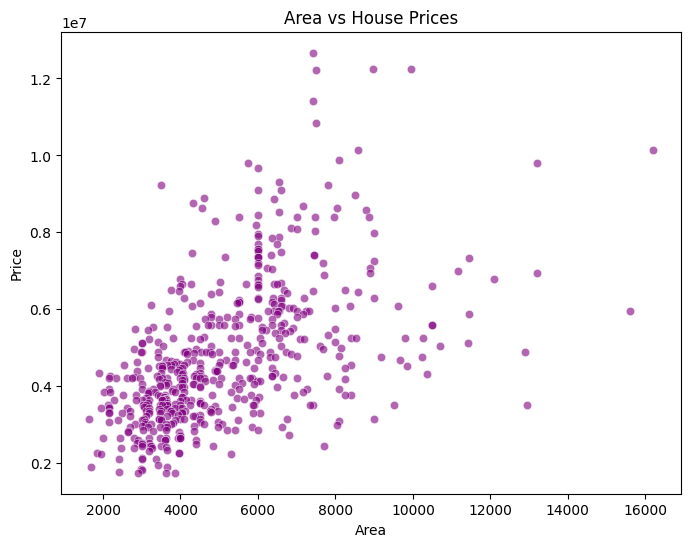

In [ ]:
#EDA - looking at relationships between features and target variable.
# Histogram for target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for area vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=data, color='purple', alpha=0.6)
plt.title("Area vs House Prices")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

###Feature Engineering Consideration

While feature engineering, the act of constructing new features from given features, can enhance the performance of predictive models (Nargesian, et al. 2017), combining existing features in this dataset was challenging. This is because of the lack of information about the layout of the property, such as the placement of bedrooms across stories. Without this context, producing meaningful features could lead to misleading assumptions about the relationships between variables. Therefore, no new features were added alongside existing features.

For future work, having more variables in the dataset will help with providing more context and allowing for a more thorough delve into feature selection.

Converting categorical variables into numerical.

In [ ]:
#List categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

#Encode categorical variables
label_enc = LabelEncoder()
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

#Verify Encoding
print("\nEncoded Categorical Columns:")
print(data[categorical_cols].head())

#Check the final dataset structure
print("\nFinal Dataset Info:")
print(data.info())



Encoded Categorical Columns:
   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea  \
0         1          0         0                0                1         1   
1         1          0         0                0                1         0   
2         1          0         1                0                0         1   
3         1          0         1                0                1         1   
4         1          1         1                0                1         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   b

##Correlation Matrix
The strongest positive correlations with the target variable (price) are area (0.54), bathrooms (0.52) and airconditioning (0.45), indicating that larger houses, with more bathrooms and that have air conditioning tend to be more expensive.

Weak correlations are seen for features hotwaterheating (0.09) and furnishingstatus (-0.30).

An overview of features and interpretation from the correlation matrix can be seen below:
<br><br><br>

| **Feature**         | **Correlation** | **Value** | **Description**                                                   |
|----------------------|-----------------|-----------|-------------------------------------------------------------------|
| **Area**            | Positive        | 0.54      | Larger houses often have higher prices.                        |
| **Bedrooms**        | Positive        | 0.37      | Houses with more bedrooms often have higher prices.              |
| **Bathrooms**       | Positive        | 0.52      | Houses with more bathrooms often have higher prices.              |
| **Stories**         | Positive        | 0.42      | Multi-story houses are typically more expensive.                 |
| **Mainroad**        | Positive        | 0.30      | Houses closer to main road often have higher prices.     |
| **Guestroom**       | Positive        | 0.26      | Houses with guest bedrooms often have a higher price.               |
| **Basement**        | Positive        | 0.19      | Houses with basements tend to have a slightly higher price.      |
| **Hotwaterheating** | Positive        | 0.09      | Facilities such as hot water heating slighly increase price.       |
| **Airconditioning** | Positive        | 0.45      | Facilities such as air conditioning often increase housr price.       |
| **Parking**         | Positive        | 0.38      | More parking spaces increase the house's price.                  |
| **Prefarea**        | Positive        | 0.33      | Houses in preferred areas often have higher prices.       |
| **Furnishingstatus**| Negative        | -0.30     | Fully furnished houses tend to be more expensive. |


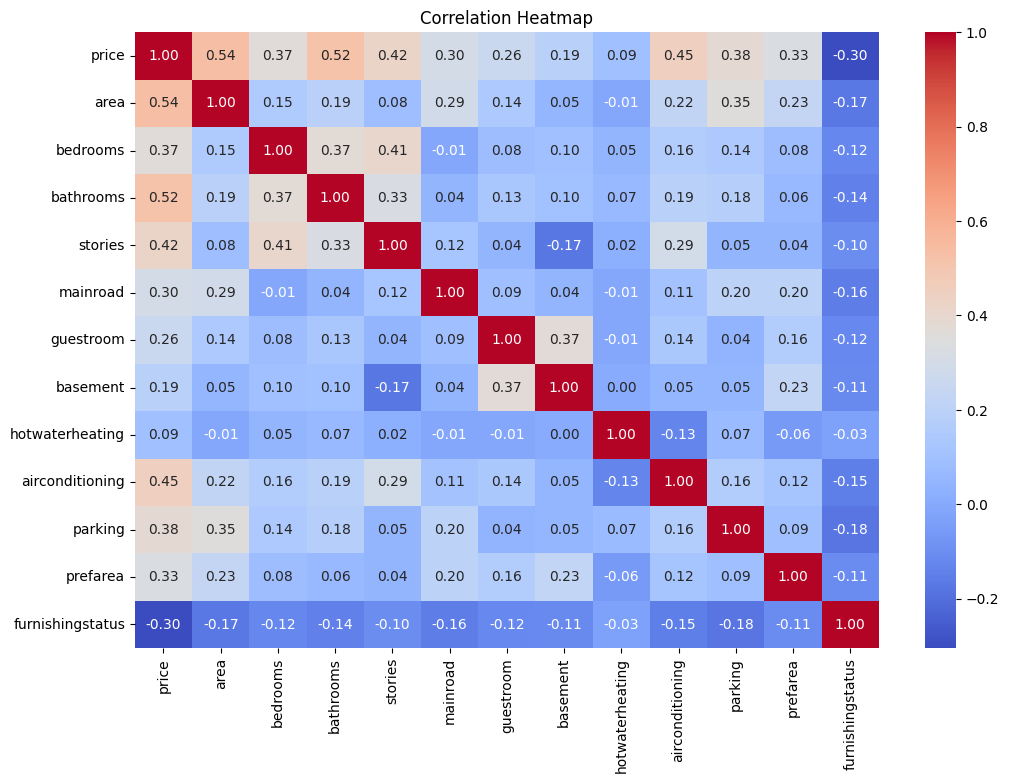

In [ ]:
# Generate correlation heatmap after encoding categorical variables
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['number'])  # Select all numerical columns (float64 and int64)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Here, I checked skewness of numerical features to understand their distribution. It can help identify extreme values.

Features such as price, area and bathroom have positive skewness meaning data points are concentrated toward smaller values, though there are a few larger values.

The feature mainroad has a negative skewness meaning most values are concentrated towards the higher end (e.g., most houses are by a main road).

Some features have no skewness such as bedrooms meaning distributions basically symmetrical.

In [ ]:
#checking skewness

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numerical_columns].skew()
print("Skewness of Numerical Features:\n", skewness)


Skewness of Numerical Features:
 price               1.187762
area                1.321188
bedrooms            0.495684
bathrooms           1.589264
stories             1.082088
mainroad           -2.065410
guestroom           1.688419
basement            0.628590
hotwaterheating     4.353428
airconditioning     0.795748
parking             0.842062
prefarea            1.254361
furnishingstatus   -0.117666
dtype: float64


To address skewness we identified features with skewness value of over 0.75 (e.g., price, area, bathrooms, prefarea and applied a log transformation to compress large values (Changyong et al, 2014).

After the transformation there was reduction in skewness, for example price decreasing from 1.18 to 0.13 or area reducing from 1.32 to 0.13, making the distributions more symmetrical.

Some visualisations have been added to show the distribution of values for features after the log transformation has been applied.



Skewed Features: Index(['price', 'area', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea'],
      dtype='object')
Skewness After Transformation:
 price              0.135874
area               0.133747
bathrooms          1.310299
stories            0.525950
guestroom          1.688419
hotwaterheating    4.353428
airconditioning    0.795748
parking            0.501800
prefarea           1.254361
dtype: float64


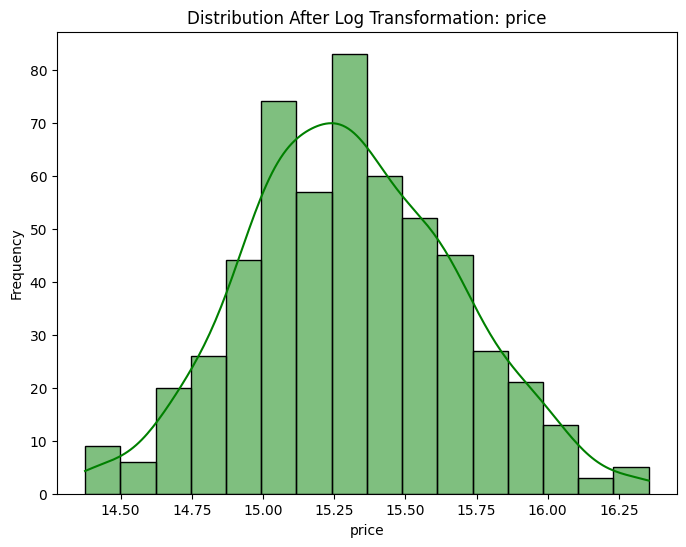

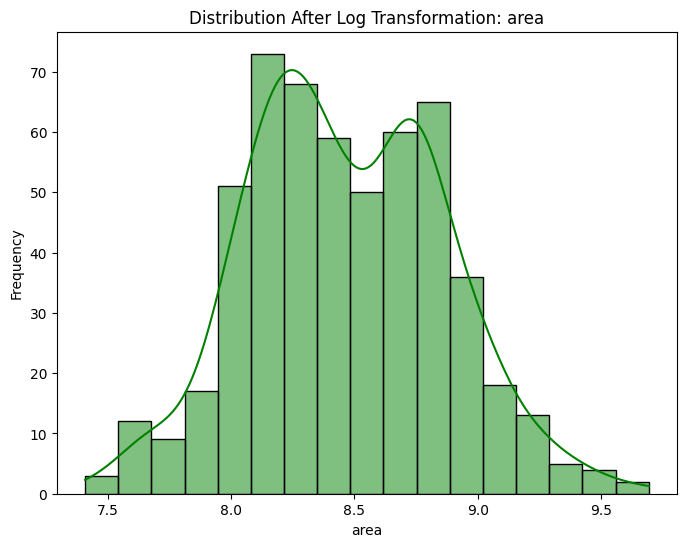

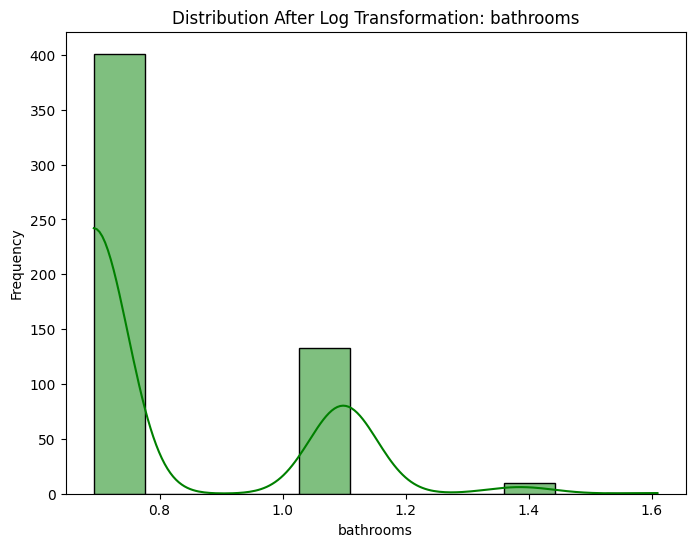

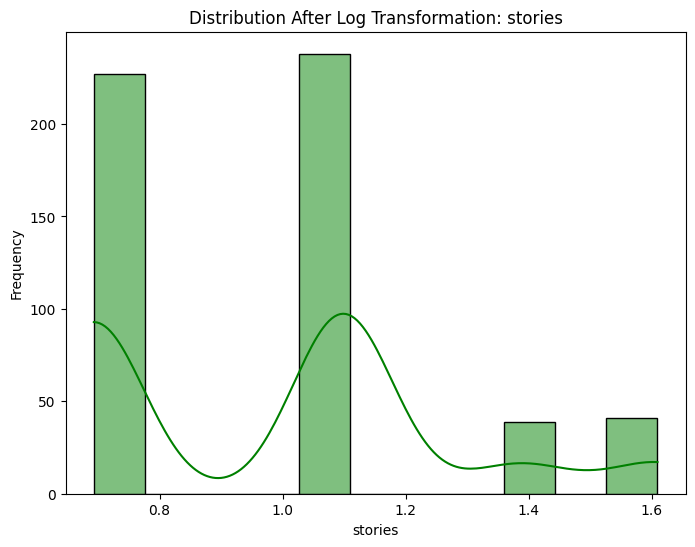

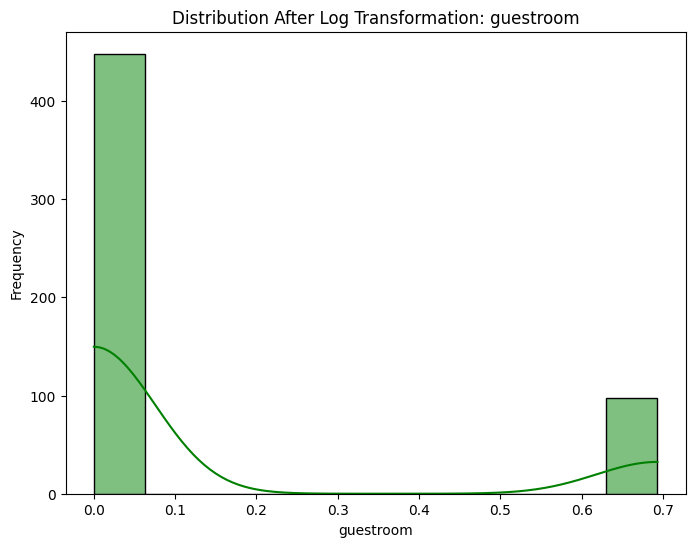

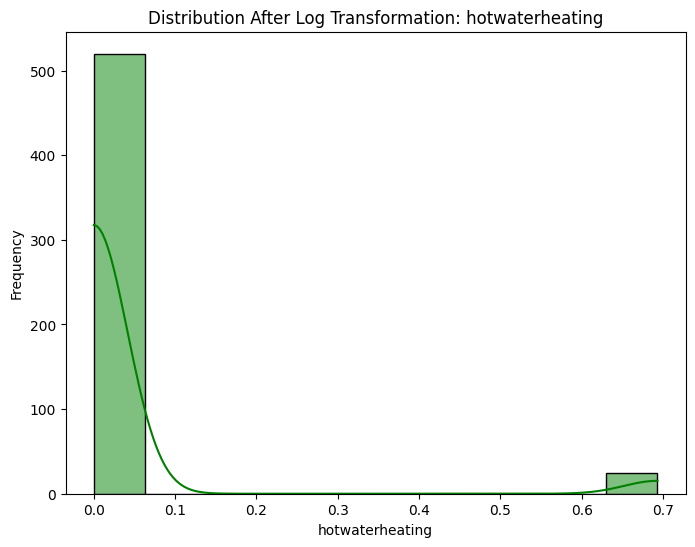

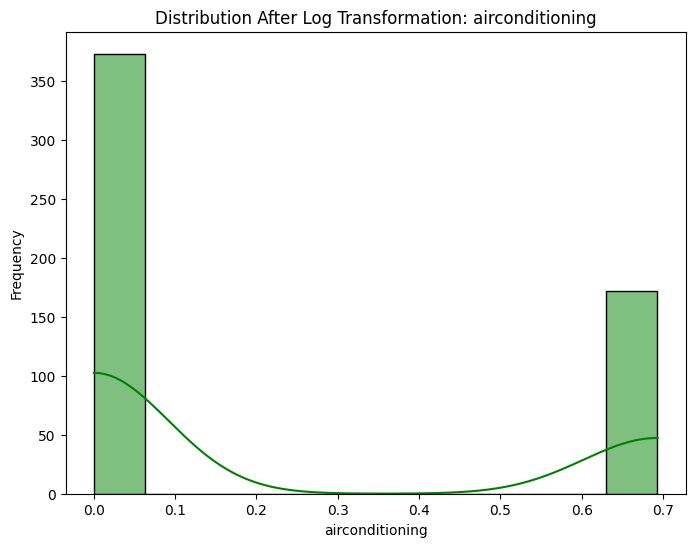

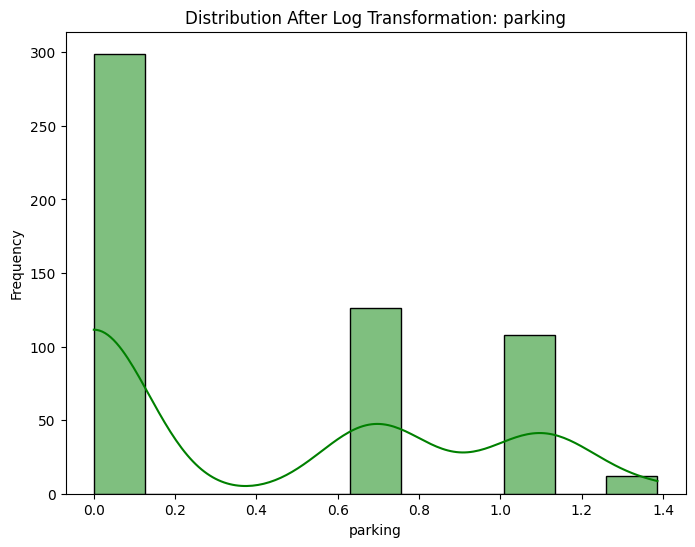

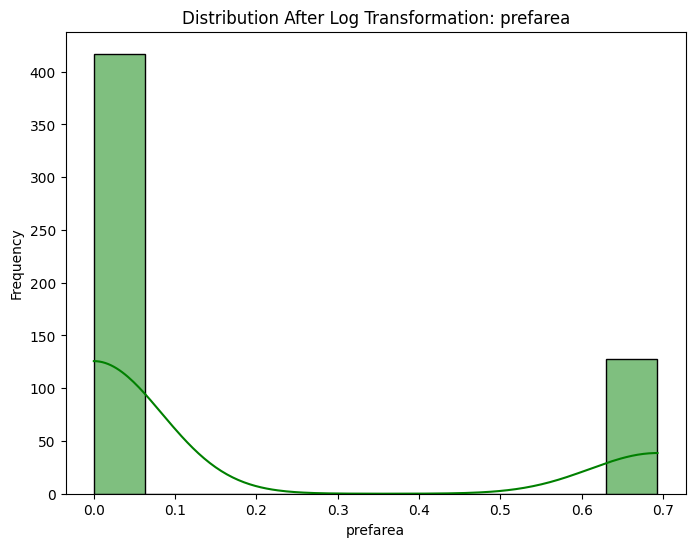

In [ ]:
# Addressing Skewed Features with Log Transformations (0.75 as threshold)
skewed_features = skewness[skewness > 0.75].index
print(f"Skewed Features: {skewed_features}")

for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

# Check skewness after transformation
skewness_after = data[skewed_features].skew()
print("Skewness After Transformation:\n", skewness_after)

# Visualize distributions after transformation
for feature in skewed_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, color='green')
    plt.title(f"Distribution After Log Transformation: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


##Multicollinearity

We calculated the Variance Inflation Factor (VIF) to detect multicollinearity with features. The results showed that area (42.52), bedrooms (24.54), and bathrooms (23.50) show high multicollinearity, indicating strong correlations with other features. These findings suggest that highly correlated features, such as area, may need to be removed or addressed using techniques like regularization.

In [ ]:
#Calculate Variance Inflation Factor (VIF)
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [
        variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])
    ]
    return vif_data

#Run VIF on the features
X_features = data.drop(columns=['price'])  # Exclude target variable
vif_results = calculate_vif(X_features)

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_results)



Variance Inflation Factor (VIF) Results:
             Feature        VIF
0               area  42.519037
1           bedrooms  24.538064
2          bathrooms  23.498773
3            stories  18.970731
4           mainroad   8.307232
5          guestroom   1.459728
6           basement   1.984938
7    hotwaterheating   1.093176
8    airconditioning   1.703792
9            parking   1.977789
10          prefarea   1.459618
11  furnishingstatus   3.201464


Below has the code where i decided to drop the area feature to decrease the VIF values and address multicollinearity issue. However, below regression results show that area is highly significant (lower p value) and has a strong positive correlation with price. The removal also does not affect model performance so it has been kept in, hence the removal of below.

In [ ]:
# Remove the 'area' column from the dataset
#X_features = X_features.drop(columns=['area'])

# Recalculate VIF values for the remaining features
#def calculate_vif(dataframe):
#    vif_data = pd.DataFrame()
#    vif_data["Feature"] = dataframe.columns
#    vif_data["VIF"] = [
#        variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])
#    ]
#    return vif_data

# Recalculate VIF
#vif_results_updated = calculate_vif(X_features)

# Print updated VIF values
#print("\nUpdated Variance Inflation Factor (VIF) Results:")
#print(vif_results_updated)


###Regression Results pre-split

The regression results were generated before the split to look at significance of features (p values) and relationships with the target variable (coefficients).

Interpretation:

The results show an R-squared value of 0.700, meaning that 70% of the variance in house prices is explained by the model.

Area, bathrooms, and stories are the most significant positive predictors of price, with area having the largest coefficient, meaning that it is highly correlated with price.

Features like basement, hotwaterheating, and airconditioning also positively impact price, while furnishingstatus negatively affects it.

Less significant features, such as bedrooms and mainroad, mean they do not contribute that much to the model

In [100]:
#GETTING P VALUES

X = data.drop(columns=['price'])
y = data['price']  # Target variable


# Add a constant for the intercept term
X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model_sm = sm.OLS(y, X_with_constant).fit()

# Print the summary to see coefficients and p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.86e-130
Time:                        15:11:46   Log-Likelihood:                 94.189
No. Observations:                 545   AIC:                            -162.4
Df Residuals:                     532   BIC:                            -106.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.8694      0.216  

###Model Performance with Signficant Features

Data was split into training and testing sets, with 80% for training and 20% for testing. Insignificant features, determined based on p values, such as bedrooms, guestroom, mainroad, parking, and furnishingstatus were excluded to focus on statistically significant predictors. A linear regression model was trained and performance was evaluated on both the training and testing sets.

The results show that the model performs well, achieving an R² score of 0.67 on the training set and 0.62 on the testing set. This suggests the model explains  62% of the variance in house prices on data not seen. The Mean Absolute Error (MAE) and Mean Squared Error (MSE) values are a bit higher for the testing set, showing slight decrease in performance when its applied to unseen data.


In [102]:
# Step 1: Define features (X) and target (y) excluding insignificant features
# Insignificant features based on p-values: 'bedrooms', 'guestroom', 'mainroad', 'parking', 'furnishingstatus'
insignificant_features = ['bedrooms', 'guestroom', 'mainroad', 'parking', 'furnishingstatus']
X_significant = data.drop(columns=['price'] + insignificant_features)  # Drop target variable and insignificant features
y = data['price']  # Target variable

# Step 2: Split the data into training and testing sets
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=42)

# Step 3: Initialize and Train the Model with significant features only
model_significant = LinearRegression()
model_significant.fit(X_train_significant, y_train)

# Step 4: Make Predictions with significant features only
y_pred_train_significant = model_significant.predict(X_train_significant)
y_pred_test_significant = model_significant.predict(X_test_significant)

# Step 5: Evaluate the Model Performance with significant features only
print("\nModel Performance With Significant Features Only:")
print("Training Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train_significant):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train_significant):.2f}")
print(f"R² Score: {r2_score(y_train, y_pred_train_significant):.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test_significant):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test_significant):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_test_significant):.2f}")

###I tested the model's performance without the statistically insignificant features, but it resulted in worse performance, with a lower R² score on the test set, indicating that those features, while individually insignificant, contribute contextually to the model by capturing subtle relationships and interactions within the data. Therefore, I have decided to retain these features to preserve the model's predictive ability and ensure that potentially valuable information is not discarded.#



Model Performance With Significant Features Only:
Training Set:
Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.04
R² Score: 0.67

Testing Set:
Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.07
R² Score: 0.62



The dataset was split into 80% training (436 rows) and 20% testing (109 rows) to train the model on most of the data while keeping some for unseen testing, with 12 features in each set.





In [ ]:
#SPLITTING MODEL INTO TEST AND TRAIN#

# Step 1: Define features and target
X = data.drop(columns=['price'])
y = data['price']  #target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")




X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


###Linear Regression Model Evaluation

Model was trained on the training dataset and predictions made on both training and testing sets. The results show that the model achieved an R² Score of 0.71 on the training set, indicating that 71% of the variance in the target variable (price) is explained by the model on the training data. On the testing set, the R² Score was slightly lower at 0.67, which still demonstrates good predictive accuracy on unseen data. The MAE and MSE values on both sets are also low, meaning that the model predictions are close to the actual values. These results suggest that the model generalizes well to new data.

In [ ]:
# Step 3: Initialize Model
model = LinearRegression()
#trains model on training dataset
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred_train = model.predict(X_train)  # Predictions on training data
y_pred_test = model.predict(X_test)  # Predictions on testing data

# Step 5: Evaluate the Model
print("\nModel Performance:")
print("Training Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_test):.2f}")



Model Performance:
Training Set:
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.04
R² Score: 0.71

Testing Set:
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
R² Score: 0.67


Analysing the coefficients of our linear regression model help to understand the importance of each feature in predicting the target variable (price).

The bar plot visualization provides a clear representation of these coefficients. Bathrooms was the most significant predictor with the highest coefficient, followed by area and the number of stories. These features have the largest impact on price. Features like bedrooms and guestroom, with relatively low coefficients, contribute a little to the model. Notably, furnishing status has a small negative coefficient, suggesting that it inversely affects price but minimally.

This analysis highlights the primary drivers of price in the dataset.


Feature Coefficients:
             Feature  Coefficient
2          bathrooms     0.485366
0               area     0.300693
3            stories     0.233651
8    airconditioning     0.210536
10          prefarea     0.190655
7    hotwaterheating     0.183538
6           basement     0.101202
4           mainroad     0.088016
9            parking     0.066401
11  furnishingstatus    -0.059218
5          guestroom     0.053872
1           bedrooms     0.018226


<ipython-input-90-d8fbfa3da450>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


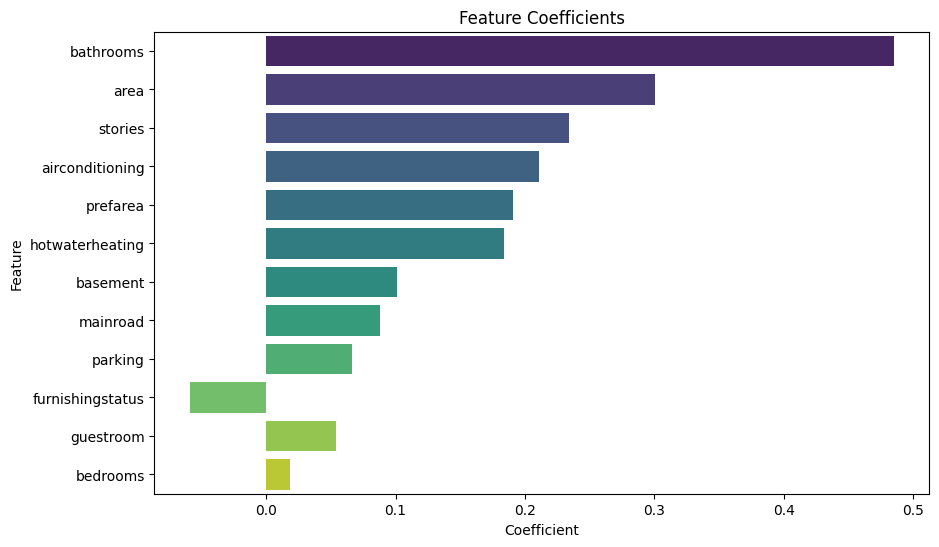

In [ ]:
# Retrieve coefficients and intercept
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by the absolute value of coefficients
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients[['Feature', 'Coefficient']])

# Optional: Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()


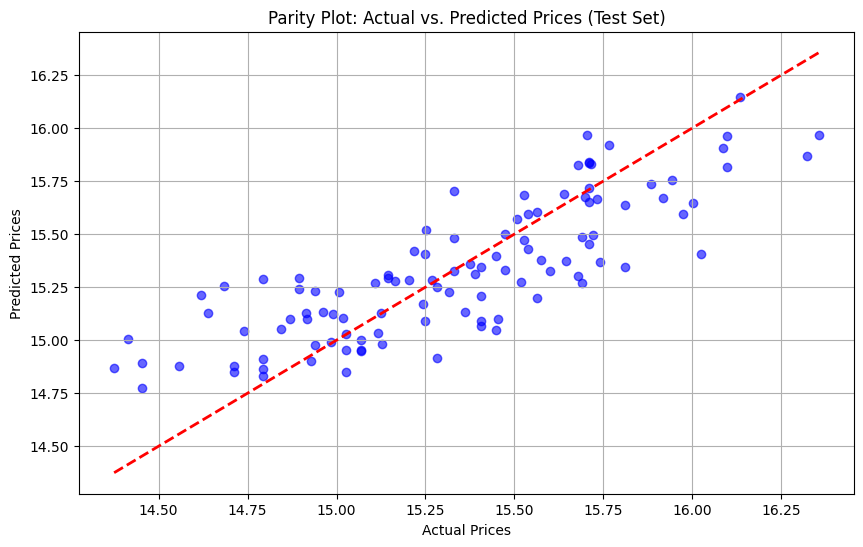

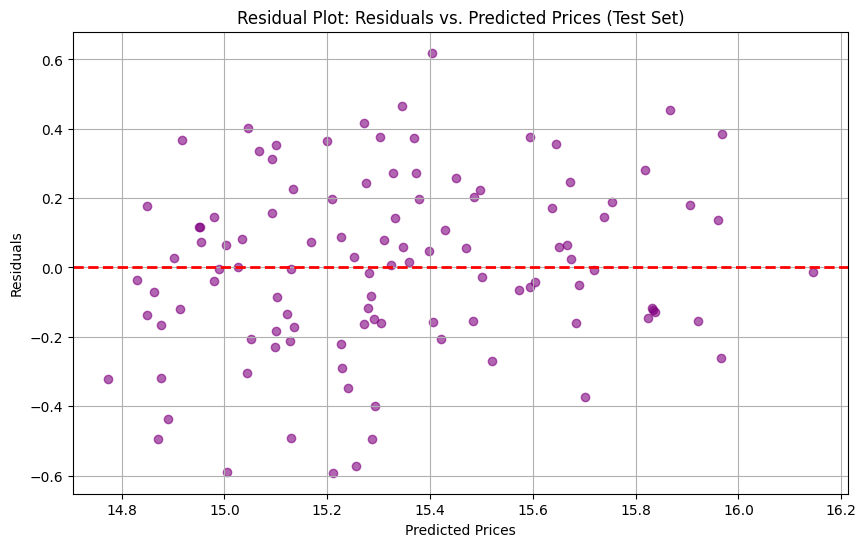

In [ ]:
#coefficients visualisations
# Parity Plot (Actual vs. Predicted Prices for Test Set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Parity Plot: Actual vs. Predicted Prices (Test Set)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

# Residual Plot (Residuals vs. Predicted Prices for Test Set)
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title("Residual Plot: Residuals vs. Predicted Prices (Test Set)")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [ ]:
# Initialize Lasso Regression with Cross-Validation
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Evaluate Model
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

print("\nLasso Regression Performance:")
print("Training Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_test):.2f}")


Lasso Regression Performance:
Training Set:
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.04
R² Score: 0.71

Testing Set:
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.06
R² Score: 0.67


Here we are extracting the coefficients from lasso regression. Since lasso regresion reduced none of the features to 0, all features contributed to the model, meaning no features were redundant enough to completely remove. For this reason all features are being kept in.

In [ ]:
# Get feature names
feature_names = X_train.columns

# Get coefficients from Lasso model
lasso_coefficients = lasso_model.coef_

# Combine feature names and coefficients into a DataFrame
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Identify features with zero coefficients
zero_coef_features = lasso_coef_df[lasso_coef_df['Coefficient'] == 0]['Feature']

# Print the features reduced to zero
print("Features reduced to zero by Lasso Regression:")
print(zero_coef_features)


Features reduced to zero by Lasso Regression:
Series([], Name: Feature, dtype: object)


##Recommended Improvements

The model can be improved on in several ways.

Whilst we removed area which had a high VIF value, experimenting further with other values with a high VIF and attempting to better address multicollinearity issues.

Explore non-linear features. House prices may not always have linear relationship with features so experimenting using polynomial terms may provide a richer insight. Also experimenting with non-linear models such as decision trees and random forest.






#References

Nargesian, F., Samulowitz, H., Khurana, U., Khalil, E.B. and Turaga, D.S., 2017, August. Learning Feature Engineering for Classification. In Ijcai (Vol. 17, pp. 2529-2535)

Changyong, F.E.N.G., Hongyue, W.A.N.G., Naiji, L.U., Tian, C.H.E.N., Hua, H.E., Ying, L.U. and Xin, M.T., 2014. Log-transformation and its implications for data analysis. Shanghai archives of psychiatry, 26(2), p.105.